In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

In [3]:
tasks = pd.read_csv('/Users/idilalp/Desktop/BMAN Group Assignment/tasks.csv')
suppliers = pd.read_csv('/Users/idilalp/Desktop/BMAN Group Assignment/suppliers.csv')
cost = pd.read_csv('/Users/idilalp/Desktop/BMAN Group Assignment/cost.csv.zip')
FINALdata = pd.read_csv('/Users/idilalp/Desktop/final_data.csv')

### 2.1. EDA of task features

We will explore the distribution of task features and their standard deviations

In [8]:
# Creating the Task dataset with all task features
task_columns = [col for col in FINALdata.columns if col.startswith("TF")] + ["Task ID"]
task_data = FINALdata[task_columns]

In [10]:
# Dropping ID column from Task dataset
task_features = task_data.drop(columns=["Task ID"])

In [12]:
# Selecting Task Features (TF columns) using `str.startswith`
task_features = FINALdata[[col for col in FINALdata.columns if col.startswith("TF")]]

# Calculating the standard deviation for each task feature
tasks_std = task_features.std()

# Converting the results to a DataFrame for better readability
import pandas as pd
tasks_std_df = pd.DataFrame(tasks_std, columns=["Standard Deviation"])
tasks_std_df.index.name = "Task Feature"
tasks_std_df = tasks_std_df.reset_index()

# Displaying the standard deviation for all task features
print(tasks_std_df)


   Task Feature  Standard Deviation
0          TF71            0.810642
1           TF3            0.319474
2          TF87            0.358308
3           TF5            0.316634
4          TF52            0.297723
5          TF64            0.386074
6          TF59            0.424123
7          TF13            0.439965
8          TF25            0.469682
9          TF50            0.403478
10          TF7            0.232436
11         TF32            0.222354
12         TF33            0.329384
13         TF82            0.539229
14         TF73            0.359976
15         TF17            0.441538
16         TF21            0.444621
17          TF9            0.479032
18         TF23            0.280886
19        TF115            0.406471
20         TF16            0.439328
21        TF114            0.395175
22         TF67            0.389308
23         TF27            0.339576
24         TF38            0.429527
25         TF18            0.499777
26         TF37            0

Number of TF features: 31


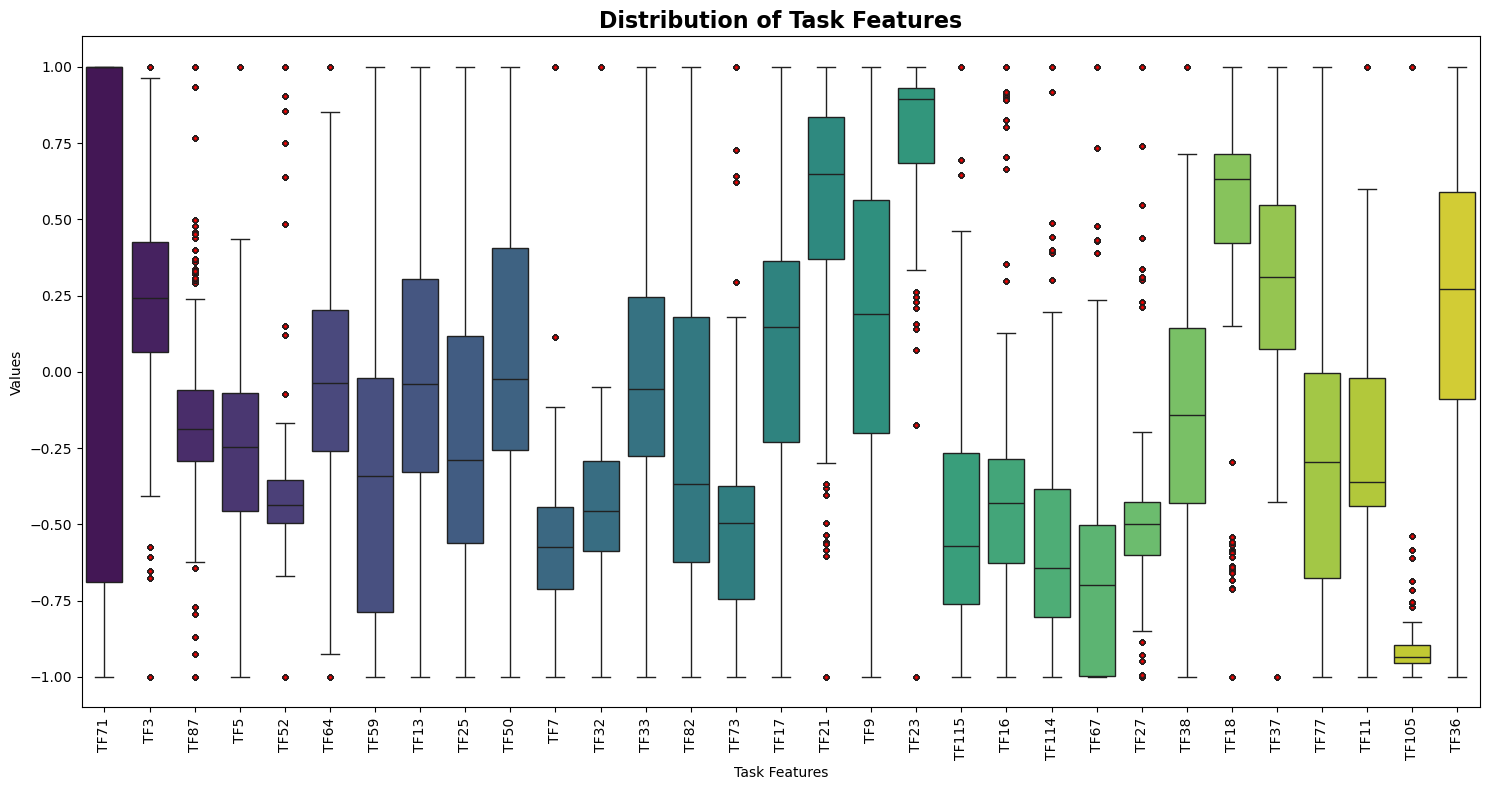

In [14]:
# Selecting Task Features (TF columns) using str.startswith
task_features = FINALdata[[col for col in FINALdata.columns if col.startswith("TF")]]

# Counting the number of task features
num_tf_features = len(task_features.columns)
print(f"Number of TF features: {num_tf_features}")

# Plotting distribution of task features
plt.figure(figsize=(15, 8))
# Changing display of outliers to avoid cluttering graph
flierprops = dict(marker='o', markersize=3, linestyle='none', markerfacecolor='red', alpha=0.6)  
boxplot = sns.boxplot(data=task_features, flierprops=flierprops, palette="viridis")

# Renaming plot and labels of axes
boxplot.set(xlabel='Task Features', ylabel='Values')
boxplot.axes.set_title('Distribution of Task Features', fontsize=16, fontweight='bold')

# Adjusting x-ticks for better readability
boxplot.set_xticks(range(len(task_features.columns)))
boxplot.set_xticklabels(task_features.columns, rotation=90, fontsize=10)

# Making sure labels on the graph don't overlap
plt.tight_layout()

# Displaying the plot
plt.show()

/var/folders/8h/h6_24n2942b1_s0pmncnsps40000gn/T/ipykernel_56378/2843287160.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


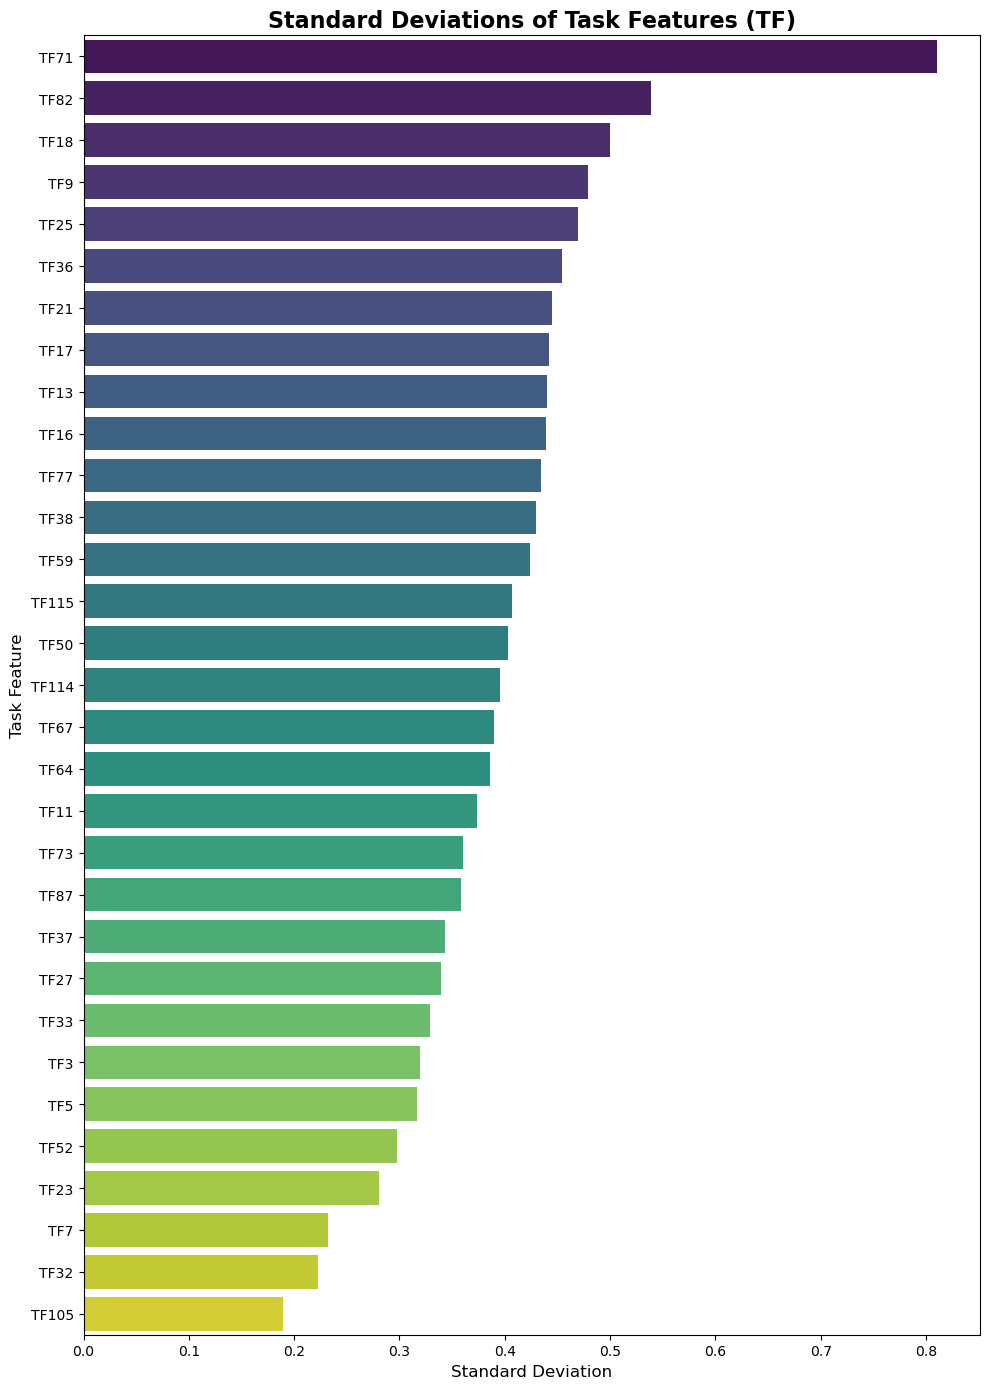

In [16]:
# Plotting a barplot for standard deviation of task features sorted from highest(top) to lowest(bottom)
plt.figure(figsize=(10, 14))
sns.barplot(
    y="Task Feature", 
    x="Standard Deviation", 
    data=tasks_std_df.sort_values(by="Standard Deviation", ascending=False), 
    palette="viridis"
)

# Adding labels and title
plt.title("Standard Deviations of Task Features (TF)", fontsize=16, fontweight="bold")
plt.xlabel("Standard Deviation", fontsize=12)
plt.ylabel("Task Feature", fontsize=12)

# Adjusting layout and showing plot
plt.tight_layout()
plt.show()


### 2.2. Analysis of Cost Data

We will analyse the distribution of cost, both overall and between each supplier

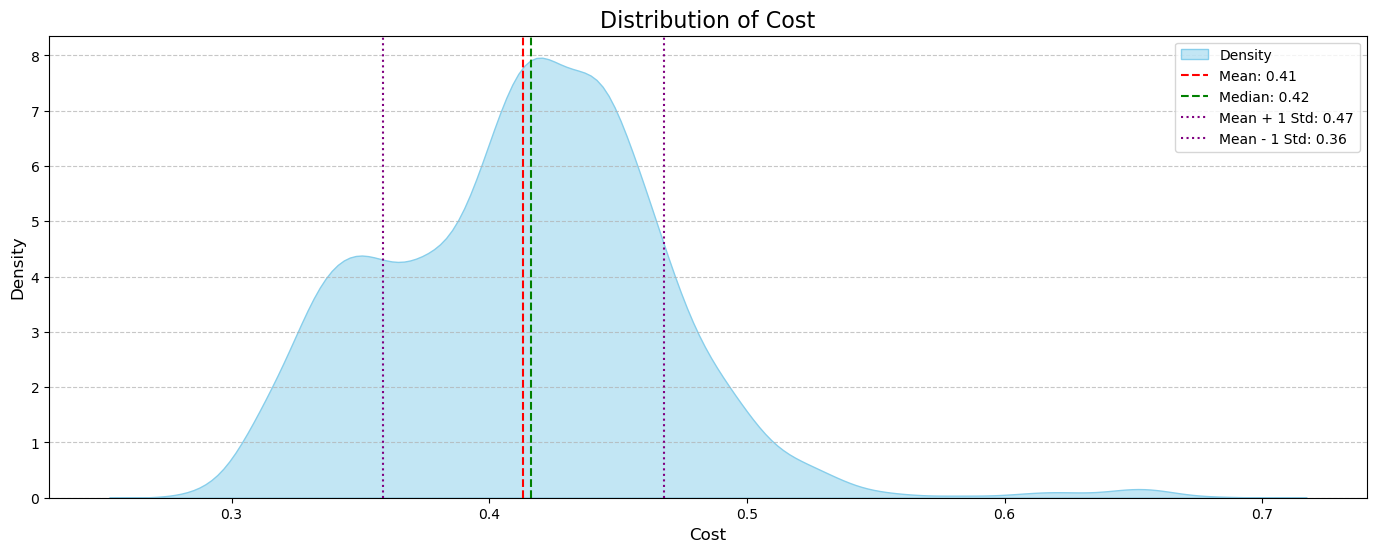

In [14]:
# Calculating descriptive statistics
mean_cost = FINALdata["Cost"].mean()
std_cost = FINALdata["Cost"].std()
median_cost = FINALdata["Cost"].median()

# Density plot for the 'Cost' variable
plt.figure(figsize=(17, 6))
sns.kdeplot(data=FINALdata, x="Cost", fill=True, color="skyblue", alpha=0.5, label="Density")

# Adding lines for mean, std, and median to the graph
plt.axvline(mean_cost, color="red", linestyle="--", label=f"Mean: {mean_cost:.2f}")
plt.axvline(median_cost, color="green", linestyle="--", label=f"Median: {median_cost:.2f}")
plt.axvline(mean_cost + std_cost, color="purple", linestyle=":", label=f"Mean + 1 Std: {mean_cost + std_cost:.2f}")
plt.axvline(mean_cost - std_cost, color="purple", linestyle=":", label=f"Mean - 1 Std: {mean_cost - std_cost:.2f}")

# Adding plot labels and legend
plt.title("Distribution of Cost", fontsize=16)
plt.xlabel("Cost", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Saving the plot as a PNG file
plt.savefig("cost_distribution.png", format="png", dpi=300)

plt.show()

Now we will analyse the performance of suppliers in relation to the cost of each task they are assigned:

In [16]:
#summarising cost data for each supplier
summary = cost.groupby("Supplier ID")["Cost"].agg(["mean", "var", "count"]).reset_index()
summary.head()

,Supplier ID,mean,var,count
0,S1,0.443069,0.003239,120
1,S10,0.403872,0.003431,120
2,S11,0.401271,0.002745,120
3,S12,0.415246,0.003090,120
4,S13,0.407144,0.003045,120


In [17]:
# Calculating mean, variance, and SEM
summary = cost.groupby("Supplier ID")["Cost"].agg(["mean", "var", "count"]).reset_index()
summary["std_dev"] = np.sqrt(summary["var"])
summary["sem"] = summary["std_dev"] / np.sqrt(summary["count"])

# Calculating confidence intervals (95% CI, Z = 1.96)
z = 1.96
summary["ci_lower"] = summary["mean"] - z * summary["sem"]
summary["ci_upper"] = summary["mean"] + z * summary["sem"]

# Sorting by mean in descending order
summary = summary.sort_values(by="mean", ascending=False).reset_index(drop=True)

We show the suppliers that will be deleted due to bad performance:

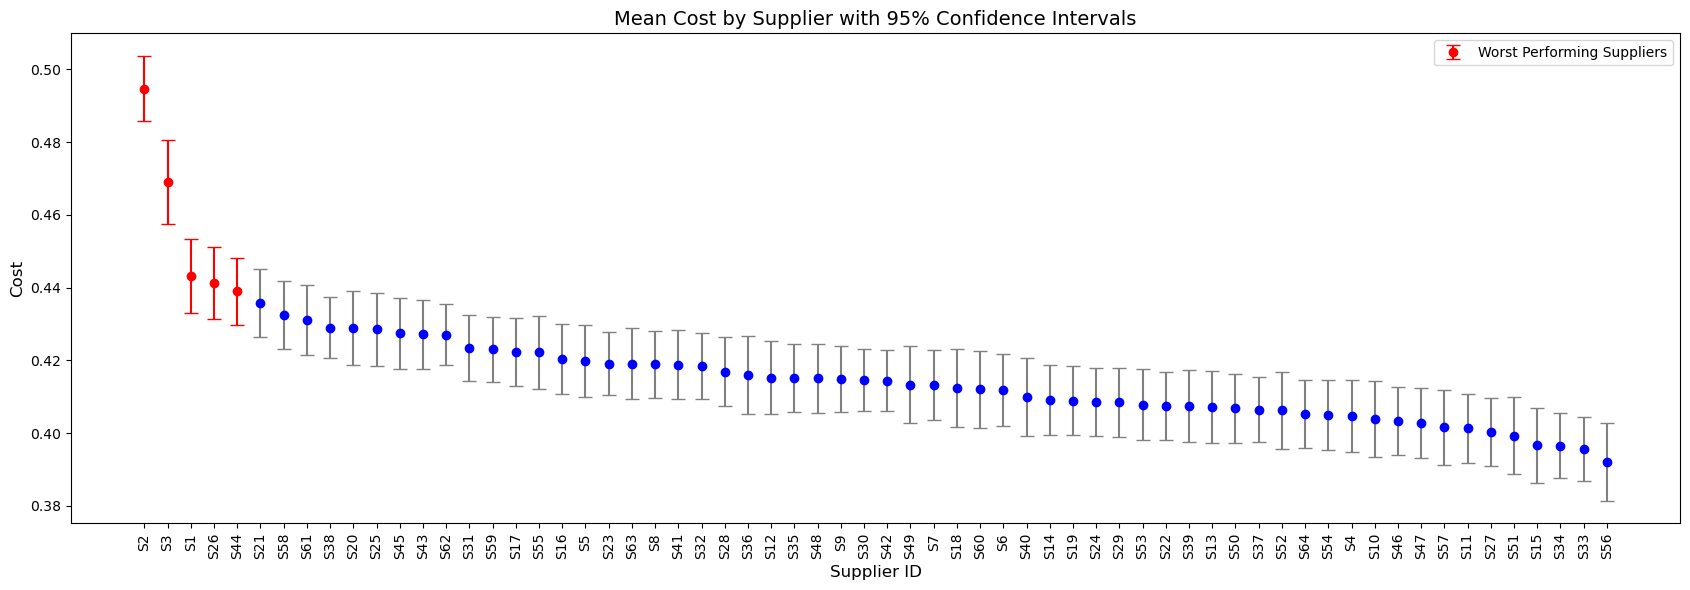

In [19]:
# Worst performing suppliers to highlight on the graph
highlight_suppliers = {"S2", "S3", "S1", "S26", "S44"}

# Defining colors based on condition
colors = ["red" if supplier in highlight_suppliers else "blue" for supplier in summary["Supplier ID"]]

# Plot
plt.figure(figsize=(17, 6))
for i, supplier in enumerate(summary["Supplier ID"]):
    plt.errorbar(
        supplier,
        summary["mean"][i],
        yerr=z * summary["sem"][i],
        fmt='o',
        capsize=5,
        color=colors[i],  # Use dynamic color
        ecolor='gray' if colors[i] == "blue" else "red",  # Highlight CI in red
        label="Highlighted" if colors[i] == "red" and i == 0 else None
    )

# Rotating x-axis labels
plt.xticks(rotation=90)

# Adding titles and labels
plt.title("Mean Cost by Supplier with 95% Confidence Intervals", fontsize=14)
plt.xlabel("Supplier ID", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.legend(["Worst Performing Suppliers"], loc="upper right")

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("error_bars_highlighted.png", format="png", dpi=300)

plt.show()

In [20]:
# Calculating mean, variance, and SEM
summary2 = FINALdata.groupby("Supplier ID")["Cost"].agg(["mean", "var", "count"]).reset_index()
summary2["std_dev"] = np.sqrt(summary2["var"])
summary2["sem"] = summary2["std_dev"] / np.sqrt(summary2["count"])

# Calculating confidence intervals (95% CI, Z = 1.96)
z = 1.96
summary2["ci_lower"] = summary2["mean"] - z * summary2["sem"]
summary2["ci_upper"] = summary2["mean"] + z * summary2["sem"]

# Sorting by mean in descending order
summary2 = summary2.sort_values(by="mean", ascending=False).reset_index(drop=True)

This is the final distribution of supplier performance (after dropping worst performing suppliers):

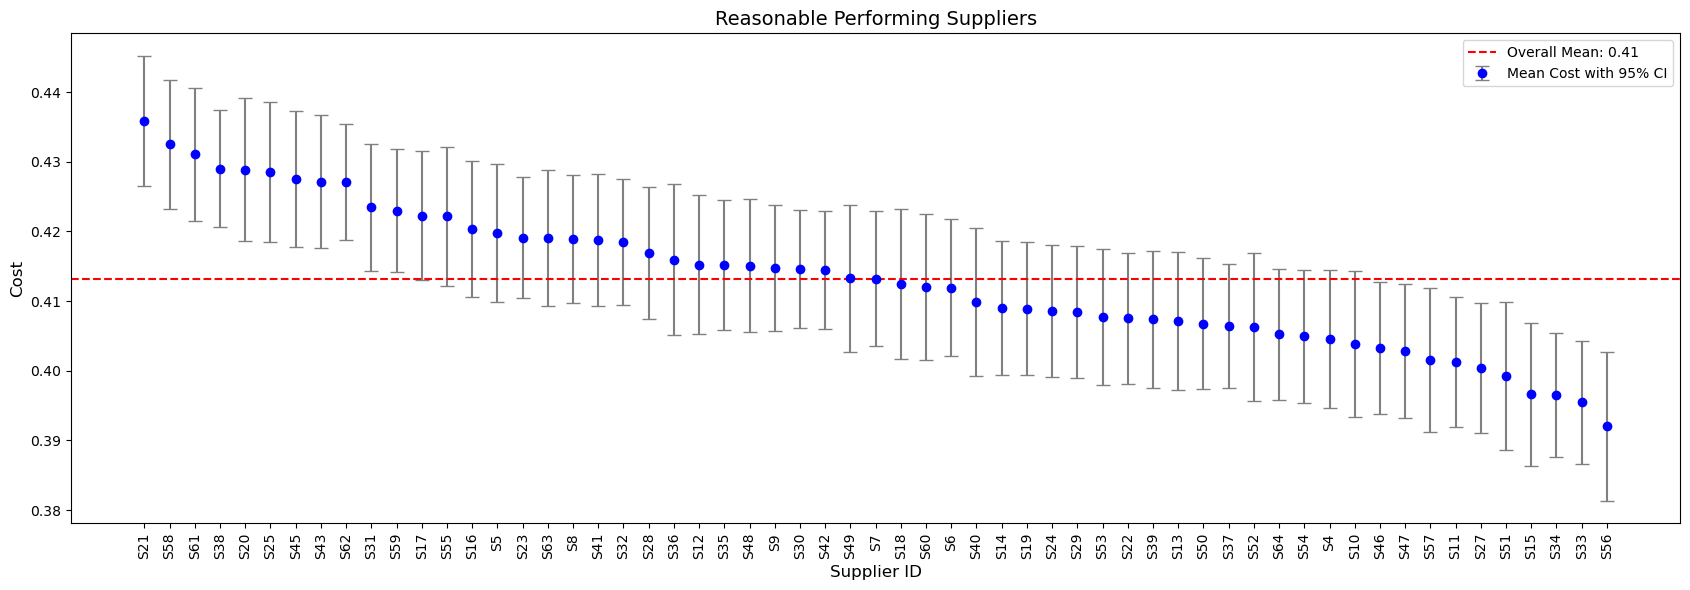

In [22]:
# Calculating the overall mean cost of all suppliers(with the worst 5 performing having been dropped)
overall_mean = summary2["mean"].mean()

# Plotting mean cost for each supplier with 95% confidence intervals
plt.figure(figsize=(17, 6))
plt.errorbar(
    summary2["Supplier ID"],
    summary2["mean"],
    yerr=z * summary2["sem"],
    fmt='o',
    capsize=5,
    color='blue',
    ecolor='gray',
    label="Mean Cost with 95% CI"
)

# Adding a horizontal line for the overall mean
plt.axhline(y=overall_mean, color='red', linestyle='--', label=f"Overall Mean: {overall_mean:.2f}")

# Rotating x-axis labels
plt.xticks(rotation=90)

# Adding titles and labels
plt.title("Reasonable Performing Suppliers", fontsize=14)
plt.xlabel("Supplier ID", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.legend()

plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("error_bars_suppliers2.png", format="png", dpi=300)

plt.show()


/var/folders/8h/h6_24n2942b1_s0pmncnsps40000gn/T/ipykernel_56378/186718150.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Supplier ID", y="Cost", data=FINALdata, palette="viridis")


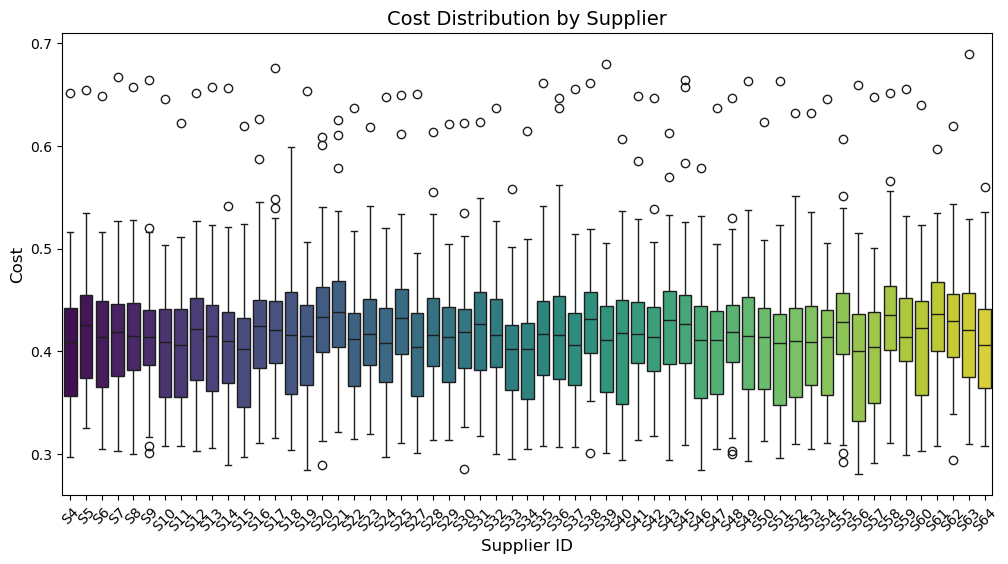

In [18]:
# Boxplot for Cost Distribution by Supplier
plt.figure(figsize=(12, 6))
sns.boxplot(x="Supplier ID", y="Cost", data=FINALdata, palette="viridis")
plt.title("Cost Distribution by Supplier", fontsize=14)
plt.xlabel("Supplier ID", fontsize=12)
plt.ylabel("Cost", fontsize=12)
plt.xticks(rotation=45)
plt.show()

Now the good combinations between tasks and suppliers based on cost:

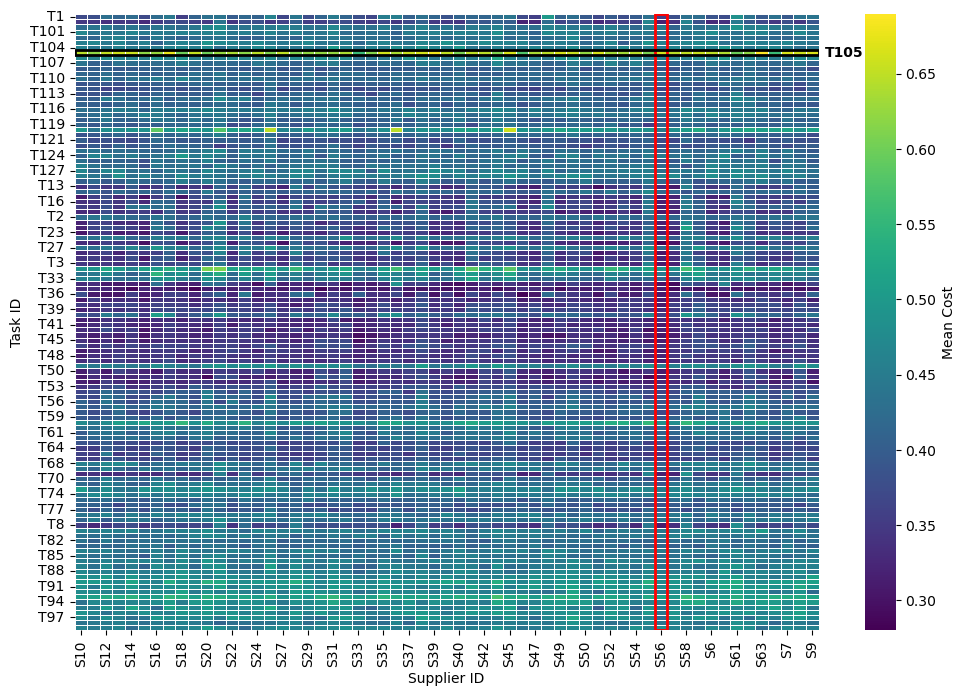

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# Creating a pivot table of mean costs for each Task and Supplier combination
tasksupplierheatmap = FINALdata.pivot_table(
    index='Task ID', columns='Supplier ID', values='Cost', aggfunc='mean'
)

# Calculating the supplier with the lowest mean cost
least_expensive_supplier = tasksupplierheatmap.mean(axis=0).sort_values(ascending=True).head(1).index[0]

# Highlight Task 105 (most expensive task)
most_expensive_task = "T105"  # Task ID for Task 105

# Plot the heatmap
plt.figure(figsize=(12, 8))
ax = sns.heatmap(
    tasksupplierheatmap, 
    cmap='viridis', 
    annot=False, 
    linewidths=0.5, 
    cbar_kws={'label': 'Mean Cost'}
)
plt.title("", fontsize=16)
plt.xlabel("Supplier ID")
plt.ylabel("Task ID")

# Highlighting the least expensive supplier by adding a red rectangle
col_idx = list(tasksupplierheatmap.columns).index(least_expensive_supplier)
rect = patches.Rectangle(
    (col_idx, 0),  # Bottom-left corner of the rectangle (in the supplier column)
    1,  # Width (1 column)
    tasksupplierheatmap.shape[0],  # Height (number of tasks)
    linewidth=2, 
    edgecolor='red',  # Highlight with red color for least expensive supplier
    facecolor='none'
)
ax.add_patch(rect)


# Highlighting Task 105 by adding a blue rectangle
row_idx = list(tasksupplierheatmap.index).index(most_expensive_task)
rect_task = patches.Rectangle(
    (0, row_idx),  # Bottom-left corner of the rectangle (in the task row)
    tasksupplierheatmap.shape[1],  # Width (number of suppliers)
    1,  # Height (1 row)
    linewidth=2, 
    edgecolor='black',  # Highlight with blue color for Task 105
    facecolor='none'
)
ax.add_patch(rect_task)

# Annotate Task 105 on the right-hand side with black color and smaller size
plt.text(
    tasksupplierheatmap.shape[1] + 0.5,  # X-coordinate outside the heatmap (to the right)
    row_idx + 0.5,  # Y-coordinate at the center of the row
    f"{most_expensive_task}",  # Task ID for Task 105
    fontsize=10,  # Smaller font size
    fontweight='bold',
    color='black',  # Black color for the annotation
    va='center',  # Vertically align to the center
    ha='left'  # Horizontally align to the left
)

# Save the plot to a file
plt.savefig("/Users/idilalp/Desktop/tasksupplierinterac.png", format="png", dpi=300)

# Show the plot
plt.show()
